Naman Raiyani

60009220057

D2-1

IPCV Experiment 5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [3]:
image_path1 = '/content/drive/MyDrive/Colab Notebooks/IPCV/10.jpg'
original_image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

In [4]:
def display_two_images(original, filtered, title1, title2):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')

    plt.show()

In [5]:
def high_pass(image, kernel):
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.sum(region * kernel)

    filtered_image = np.clip(filtered_image, 0, 255)
    filtered_image = filtered_image.astype(np.uint8)

    return filtered_image

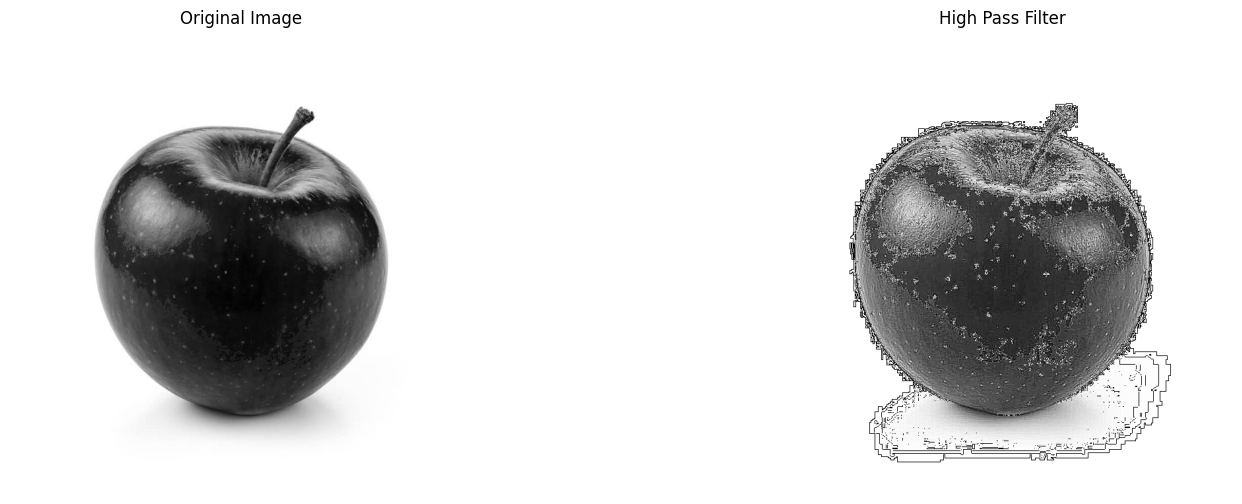

In [6]:
kernel1 = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])
high_pass_image1 = high_pass(original_image1, kernel1)
display_two_images(original_image1, high_pass_image1,
                     'Original Image', 'High Pass Filter')

In [7]:
image_path2 = '/content/drive/MyDrive/Colab Notebooks/IPCV/9.jpg'
original_image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

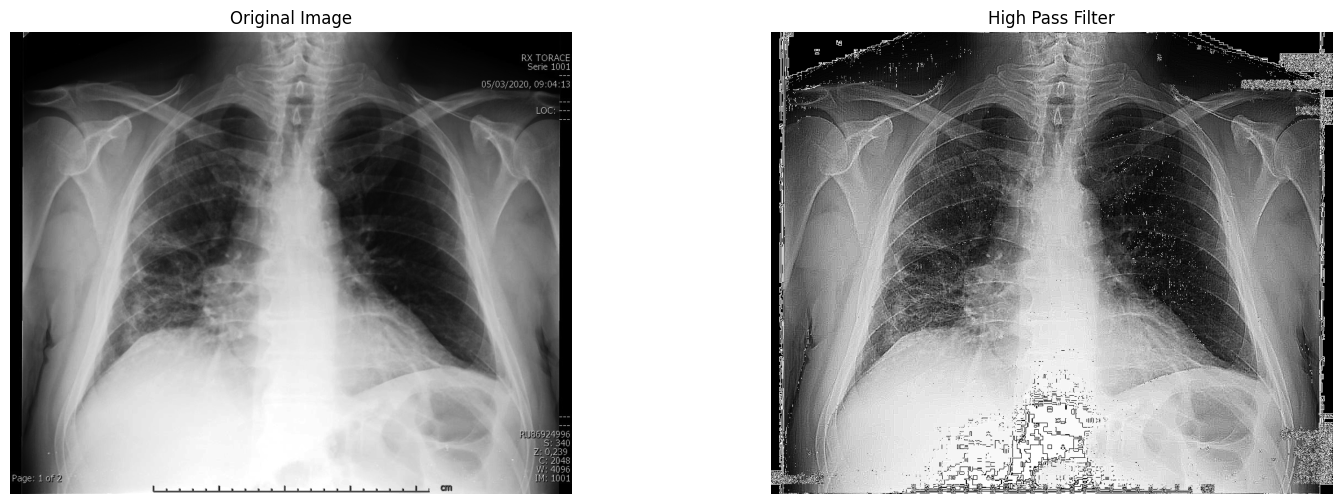

In [8]:
high_pass_image2 = high_pass(original_image2, kernel1)
display_two_images(original_image2, high_pass_image2,
                     'Original Image', 'High Pass Filter')

In [9]:
def high_boost(image, kernel, A):
    high_pass_image = high_pass(image, kernel)

    high_pass_image = (A - 1) * image + high_pass_image

    high_pass_image = np.clip(high_pass_image, 0, 255).astype(np.uint8)

    return high_pass_image

In [10]:
A = 1

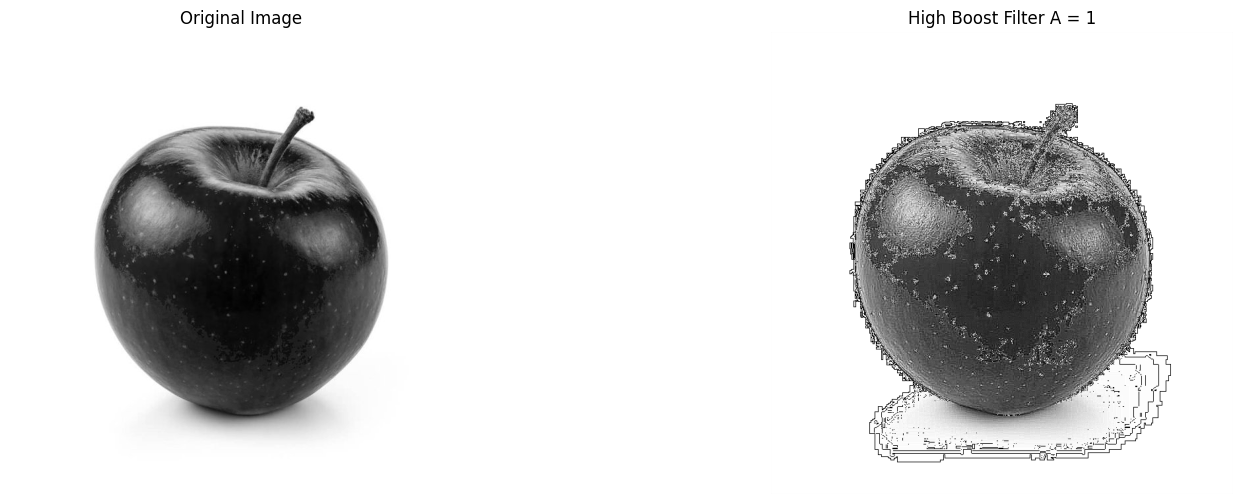

In [11]:
high_boost_image1 = high_boost(original_image1, kernel1, A)
display_two_images(original_image1, high_boost_image1,
                     'Original Image', 'High Boost Filter A = 1')

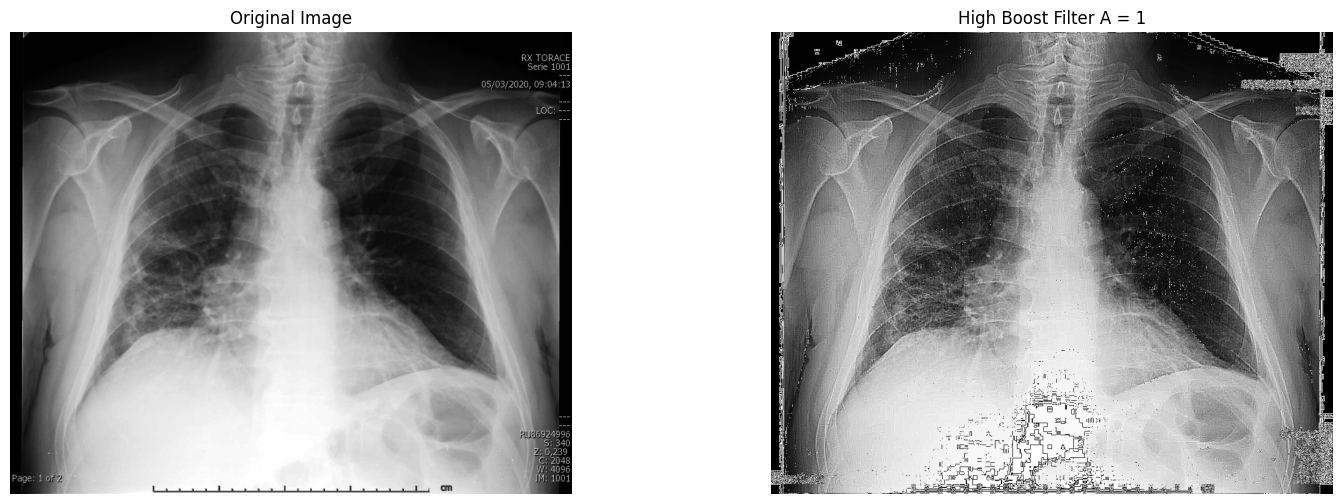

In [12]:
high_boost_image2 = high_boost(original_image2, kernel1, A)
display_two_images(original_image2, high_boost_image2,
                     'Original Image', 'High Boost Filter A = 1')

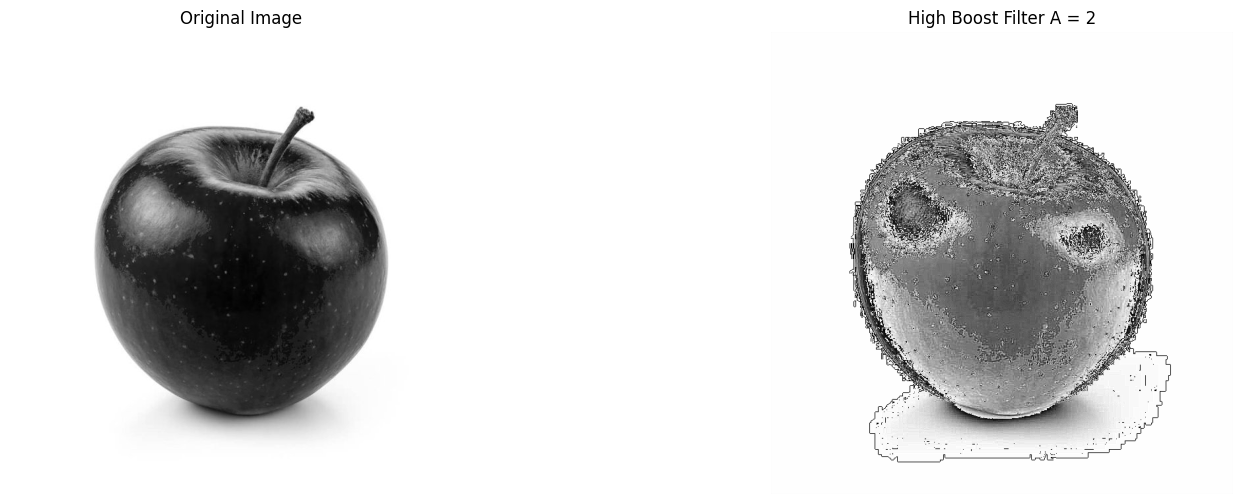

In [13]:
A = 2
high_boost_image3 = high_boost(original_image1, kernel1, A)
display_two_images(original_image1, high_boost_image3,
                     'Original Image', 'High Boost Filter A = 2')

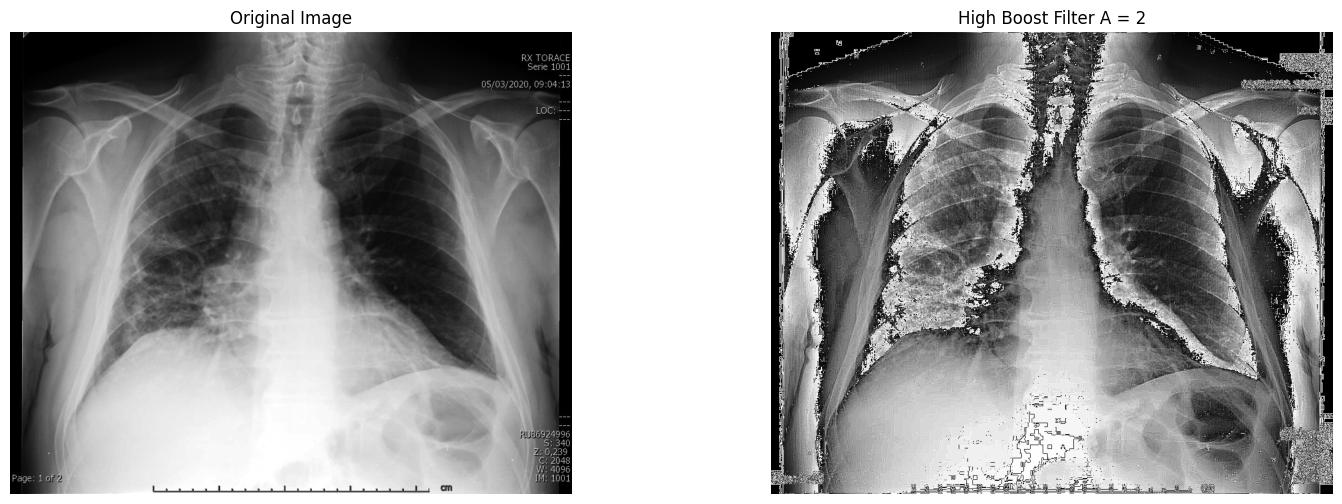

In [20]:
A = 2
high_boost_image4 = high_boost(original_image2, kernel1, A)
display_two_images(original_image2, high_boost_image4,
                     'Original Image', 'High Boost Filter A = 2')

In [14]:
image_path1 = '/content/drive/MyDrive/Colab Notebooks/IPCV/10.jpg'
original_image1 = cv2.imread(image_path1)
original_image1 = cv2.cvtColor(original_image1, cv2.COLOR_BGR2RGB)

In [15]:
def high_pass_colored(image, kernel):

    kernel_size = kernel.shape[0]
    padding = kernel_size // 2

    padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for c in range(image.shape[2]):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c]
                filtered_image[i, j, c] = np.sum(region * kernel)

    filtered_image = np.clip(filtered_image, 0, 255)
    filtered_image = filtered_image.astype(np.uint8)

    return filtered_image

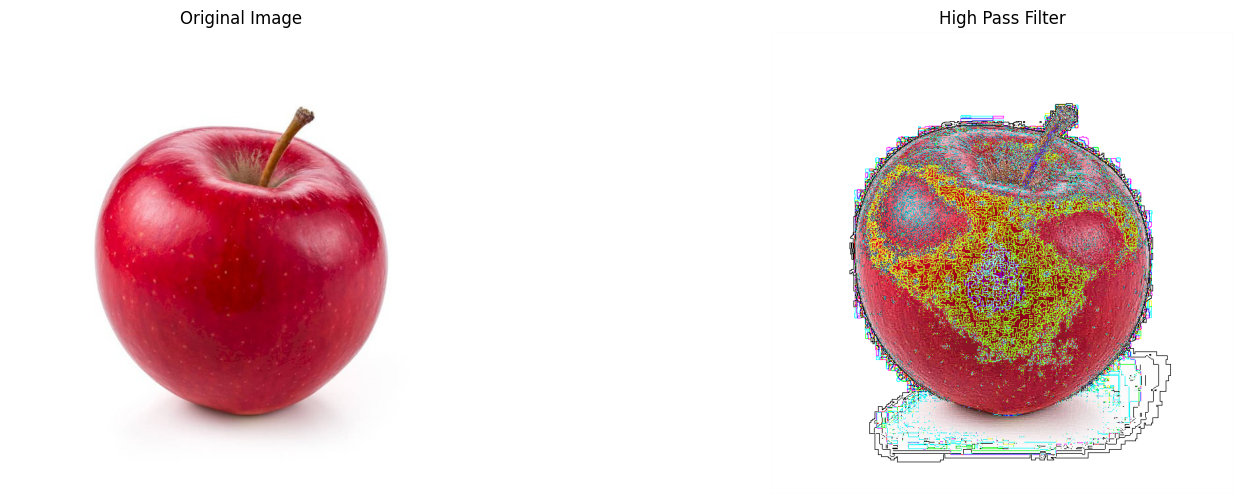

In [16]:
kernel1 = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])
high_pass_image_colored_1 = high_pass_colored(original_image1, kernel1)
display_two_images(original_image1, high_pass_image_colored_1,
                     'Original Image', 'High Pass Filter')

In [17]:
def high_boost_colored(image, kernel, A):
    high_pass_image = high_pass_colored(image, kernel)

    high_pass_image = (A - 1) * image + high_pass_image

    high_pass_image = np.clip(high_pass_image, 0, 255).astype(np.uint8)

    return high_pass_image

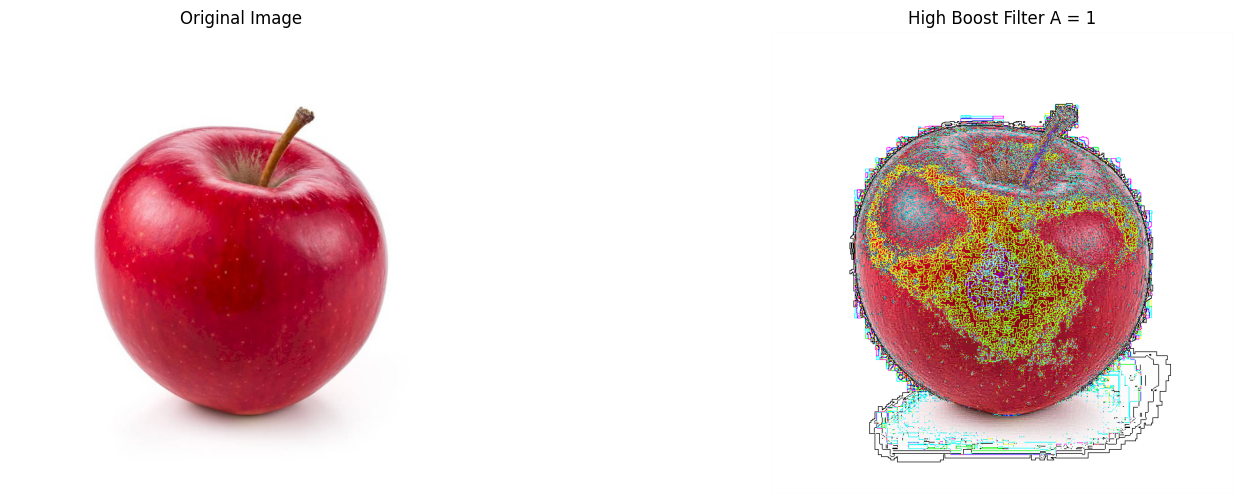

In [18]:
A=1
high_boost_image_colored = high_boost_colored(original_image1, kernel1, A)
display_two_images(original_image1, high_boost_image_colored,
                     'Original Image', 'High Boost Filter A = 1')

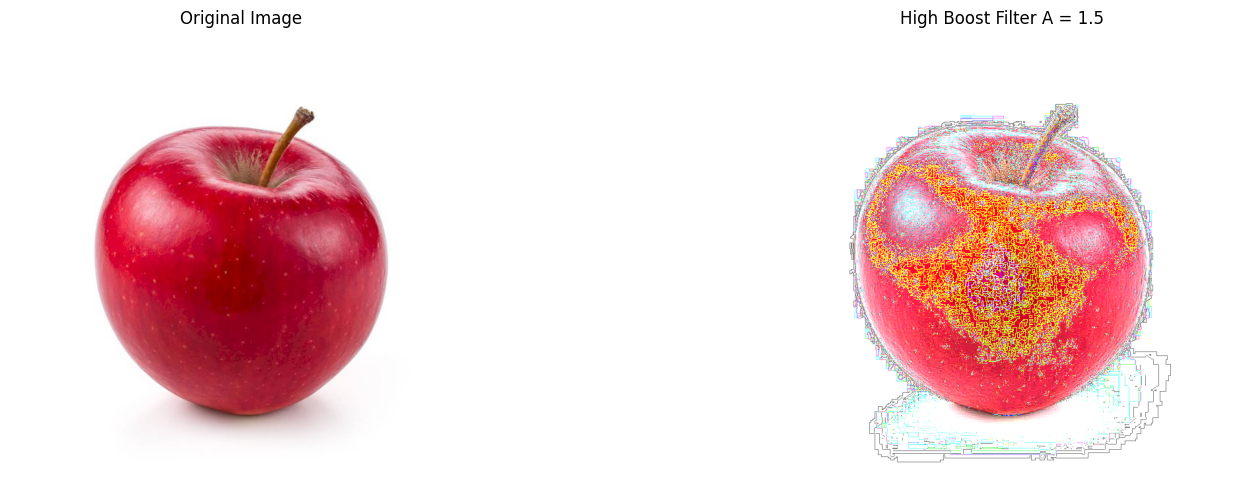

In [22]:
A=1.5
high_boost_image_colored = high_boost_colored(original_image1, kernel1, A)
display_two_images(original_image1, high_boost_image_colored,
                     'Original Image', 'High Boost Filter A = 1.5')

## Observations

- **High Pass Filter**: The high pass filter effectively highlighted edges with minimal blurring. Fine details were preserved, but noise was also amplified.

- **Laplacian Filter**: This filter highlighted edges more aggressively, resulting in sharper transitions in images. However, it also amplified noise, especially in areas with low contrast.

- **Amplification Factor \( a = 1.0 \)**: The result was similar to high pass filtering, with no significant enhancement in details.

- **Amplification Factor \( a = 2.0 \)**: At this level, edges became noticeably sharper, and overall contrast increased. However, some background noise also became more pronounced, leading to a grainier appearance.

- **After High Pass Filtering**: The resulting images showcased enhanced edges and details, demonstrating the effectiveness of the filtering process.

## Applications of High Pass and High Boost Filtering

High pass and high boost filtering techniques have a wide range of applications in various fields, including:

1. **Image Enhancement**:
   - Used in photography and graphic design to improve the clarity and contrast of images by highlighting edges and fine details.

2. **Medical Imaging**:
   - Enhances features in X-rays, MRI scans, and CT images, making it easier to identify abnormalities or lesions.

3. **Object Detection**:
   - Essential in computer vision tasks, such as facial recognition and object tracking, where clear edge detection is crucial for accurate identification.

4. **Remote Sensing**:
   - Applied in satellite imagery to enhance land use and environmental features, helping in urban planning and resource management.

5. **Document Analysis**:
   - Used in OCR (Optical Character Recognition) systems to improve text recognition by enhancing the edges of letters and characters.

6. **Video Processing**:
   - Employed in video surveillance and analysis to detect motion and track moving objects effectively.

These applications demonstrate the versatility and importance of high pass and high boost filtering in modern imaging and computer vision technologies.


## Conclusion

The 3x3 Laplacian kernel effectively enhanced edges and details through high pass filtering. High boost filtering further amplified these features, increasing contrast while introducing some noise. Balancing the amplification factor \( a \) was essential; moderate values improved detail without excessive noise, demonstrating the importance of parameter tuning for optimal image quality.
